### Uber Pickups Analysis Quiz

The question set is based on the August dataset, `uber-raw-data-aug14.csv`.

#### Keeping the dataset ready before questions

In [5]:
import pandas as pd

df = pd.read_csv('uber-raw-data-aug14.csv')
df.head(10)

,Date/Time,Lat,Lon,Base
0,8/1/2014 0:03:00,40.7366,-73.9906,B02512
1,8/1/2014 0:09:00,40.7260,-73.9918,B02512
2,8/1/2014 0:12:00,40.7209,-74.0507,B02512
3,8/1/2014 0:12:00,40.7387,-73.9856,B02512
4,8/1/2014 0:12:00,40.7323,-74.0077,B02512
5,8/1/2014 0:13:00,40.7349,-74.0033,B02512
6,8/1/2014 0:15:00,40.7279,-73.9542,B02512
7,8/1/2014 0:17:00,40.7210,-73.9937,B02512
8,8/1/2014 0:19:00,40.7195,-74.0060,B02512
9,8/1/2014 0:20:00,40.7448,-73.9799,B02512


#### Q1. On what date did we see the most number of Uber pickups?

**Skill Test:** Grouping & Counting

In [6]:
# Convert the 'Date/Time' column to datetime format

df['Date/Time'] = pd.to_datetime(df['Date/Time'])

# Group by date and count the number of pickups

df['Date'] = df['Date/Time'].dt.date
grouped_df = df.groupby('Date').size().rename('Count').reset_index()

grouped_df

# Find the date with the highest number of pickups

grouped_df = grouped_df.set_index('Date')
grouped_df

max_pickups_date  = grouped_df['Count'].idxmax()
max_pickups_date



datetime.date(2014, 8, 7)

#### Q.2 How many Uber pickups were made on the date with the highest number of pickups?

**Skill Test:** Indexing and filtering

In [7]:
# Filter the DataFrame to include only the rows for the date with the highest number of pickups



res_df = df[df['Date'] == max_pickups_date]

res_df
# Get the count of pickups on the highest date

pickup_count_on_highest_date = grouped_df['Count'].max()

pickup_count_on_highest_date

32759

#### Q.3 How many unique TLC base companies are affiliated with the Uber pickups in the dataset?

**Skill Test:** Counting unique values

In [8]:
# Count the number of unique TLC base companies

unique_TLC_base_companies = df['Base'].nunique()
unique_TLC_base_companies


5

#### Q.4 Which TLC base company had the highest number of pickups?

**Skill Test:** Grouping, counting, and finding the maximum

In [9]:
# Group by TLC base company and count the number of pickups

tlc_based_grouping = df.groupby('Base').size().reset_index(name = 'Company_count')
tlc_based_grouping

# Company with highest number of pickups

tlc_based_grouping.loc[tlc_based_grouping['Company_count'].idxmax(),'Base']

'B02617'

#### Q.5 How many Uber pickups were made at each unique TLC base company?

**Skill Test:** Grouping and counting

In [10]:
# Group by TLC base company and count the number of pickups

tlc_based_grouping = df.groupby('Base').size().reset_index(name = 'Company_count')
tlc_based_grouping


,Base,Company_count
0,B02512,31472
1,B02598,220129
2,B02617,355803
3,B02682,173280
4,B02764,48591


#### Q.6 Can you determine the busiest time of day for Uber pickups based on the date/time column?

**Skill Test:** Extracting time components, grouping, counting, and finding the maximum

In [11]:
# Extract the hour from the 'Date/Time' column
df['hour'] = df['Date/Time'].dt.hour
df

# Group by hour and count the number of pickups
hour_based_grouping = df.groupby('hour').size().reset_index(name = 'Pickup_counts')
hour_based_grouping

# Find the hour with the highest number of pickups

hourbased_highest_pickups_index = hour_based_grouping['Pickup_counts'].idxmax()
hour_based_grouping.loc[hourbased_highest_pickups_index,'hour']



17

#### Q.7 Can you create a visualization (e.g., a bar chart or line plot) to represent the number of Uber pickups over time?

**Skill Test:** Data Visualization using Plotting function 

Text(0.5, 1.0, 'Pickups Per Date')

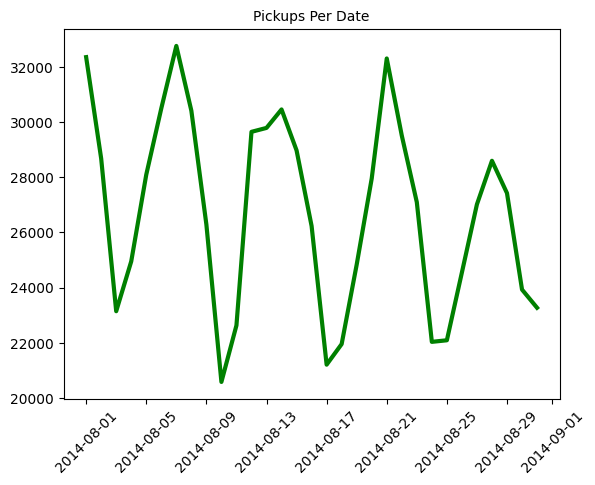

In [12]:
import matplotlib.pyplot as plt


# Group by date and count the number of pickups
grouped_df
# Create a line plot to visualize the number of pickups over time
x_bar = grouped_df.index
y_bar = grouped_df
plt.plot(x_bar,y_bar, linewidth = 3, color="green")
plt.xticks(rotation=45)
plt.title("Pickups Per Date",fontsize = 10)

#### Q8. Can you create a scatter plot to visualize the distribution of Uber pickups based on latitude and longitude?

**Skill Test:** Scatter Plot

Text(0, 0.5, 'Longitude')

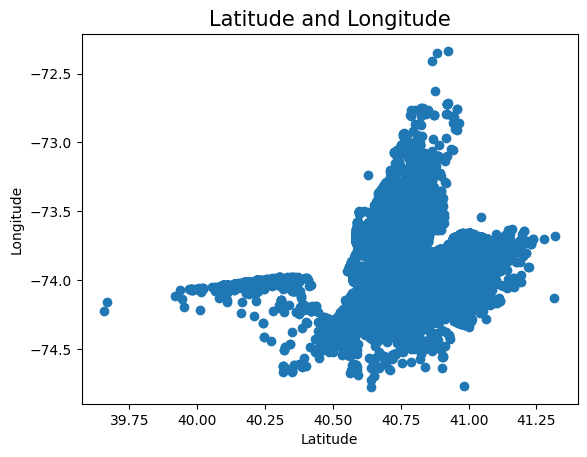

In [13]:
# Create a scatter plot to visualize the distribution of Uber pickups based on latitude and longitude
plt.scatter(df['Lat'], df['Lon'])
plt.title("Latitude and Longitude", fontsize = 15)
plt.xlabel("Latitude", fontsize = 10)
plt.ylabel("Longitude", fontsize = 10)

#### Q9. Can you create a bar chart to compare the number of Uber pickups for each TLC base company?

**Skill Test:** Bar Chart

Text(0, 0.5, 'Pickups')

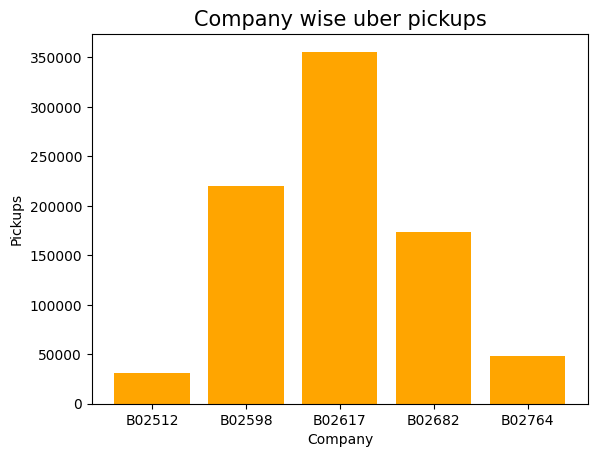

In [14]:
# Create a bar chart to compare the number of Uber pickups for each TLC base company
tlc_based_grouping
x_bar = tlc_based_grouping['Base']
y_bar = tlc_based_grouping['Company_count']
plt.bar(x_bar,y_bar, color = "orange")
plt.title("Company wise uber pickups", fontsize = 15)
plt.xlabel("Company", fontsize = 10)
plt.ylabel("Pickups", fontsize = 10)

#### Q10. Can you create a pie chart to display the percentage distribution of Uber pickups for each day of the week?

**Skill Test:** Pie Chart

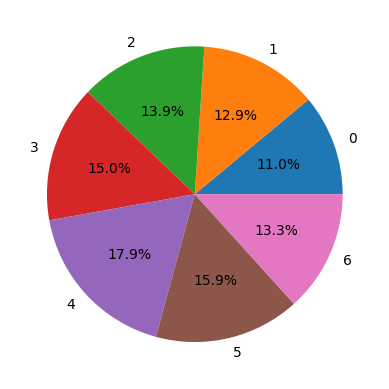

In [15]:
# Group by day of the week and count the number of pickups

df['week_day'] = df['Date/Time'].dt.weekday

weekday_based_grouping = df.groupby('week_day').size()
weekday_based_grouping

# Create a pie chart to display the percentage distribution of Uber pickups for each day of the week
categories = weekday_based_grouping.index
values = weekday_based_grouping

plt.pie(values, labels = categories,autopct='%1.1f%%')
plt.show()